In [1]:
# task 1
# a

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score , recall_score , f1_score , roc_curve , roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# b
df = pd.read_csv('DS2_C5_S3_Income_Data_Challenge.csv')
df

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# c
df.shape

(32561, 15)

In [4]:
# d
df.describe()

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# task 2

# a

df.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [6]:
# b 
# no missing value treatment required

In [13]:
df.dtypes

Age                  int64
WorkClass         category
Fnlwgt               int64
Education         category
Education_Num        int64
Marital_Status    category
Occupation        category
Relationship      category
Race              category
Gender            category
Capital_Gain         int64
Capital_Loss         int64
Hours_Per_Week       int64
Native_Country    category
Income_Bracket    category
dtype: object

In [14]:
# c

for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].astype('category')

In [16]:
# d 

le = preprocessing.LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'category':
        df[i] = le.fit_transform(df[i])

In [18]:
# e

scale = MinMaxScaler()
df_scaled = pd.DataFrame(scale.fit_transform(df) , columns = df.columns)
df_scaled

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,0.301370,0.875,0.044302,0.600000,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.021740,0.0,0.397959,0.951220,0.0
1,0.452055,0.750,0.048238,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.000000,0.0,0.122449,0.951220,0.0
2,0.287671,0.500,0.138113,0.733333,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.000000,0.0,0.397959,0.951220,0.0
3,0.493151,0.500,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.000000,0.0,0.397959,0.951220,0.0
4,0.150685,0.500,0.221488,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.000000,0.0,0.397959,0.121951,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.500,0.166404,0.466667,0.733333,0.333333,0.928571,1.0,1.0,0.0,0.000000,0.0,0.377551,0.951220,0.0
32557,0.315068,0.500,0.096500,0.733333,0.533333,0.333333,0.500000,0.0,1.0,1.0,0.000000,0.0,0.397959,0.951220,1.0
32558,0.561644,0.500,0.094827,0.733333,0.533333,1.000000,0.071429,0.8,1.0,0.0,0.000000,0.0,0.397959,0.951220,0.0
32559,0.068493,0.500,0.128499,0.733333,0.533333,0.666667,0.071429,0.6,1.0,1.0,0.000000,0.0,0.193878,0.951220,0.0


In [22]:
# f

column_correlation = df.corr()
column_correlation

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
Age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234037
WorkClass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.033835,0.012216,0.138962,-0.007690,0.051604
Fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
Education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
Education_Num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
Marital_Status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
Occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.025505,0.017987,0.080383,-0.012543,0.075468
Relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
Race,0.028718,0.049742,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.137852,0.071846
Gender,0.088832,0.095981,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,-0.008119,0.215980


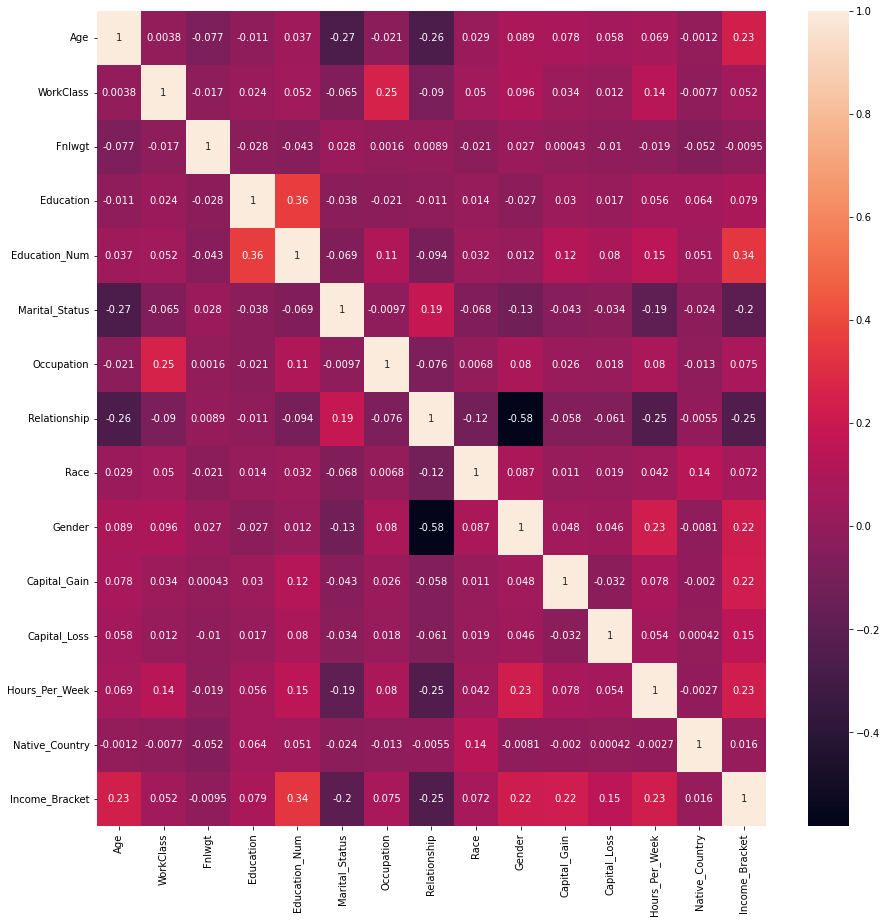

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(column_correlation, annot =True);

In [25]:
# g

x = df_scaled.iloc[:,:-1]
y = df_scaled.iloc[:,-1]
dataset = len(df_scaled)
train_num = int(0.8*dataset)
x_train = x.iloc[:train_num,:]
x_test = x.iloc[train_num : ,:]
y_train = y.iloc[:train_num]
y_test = y.iloc[train_num:]

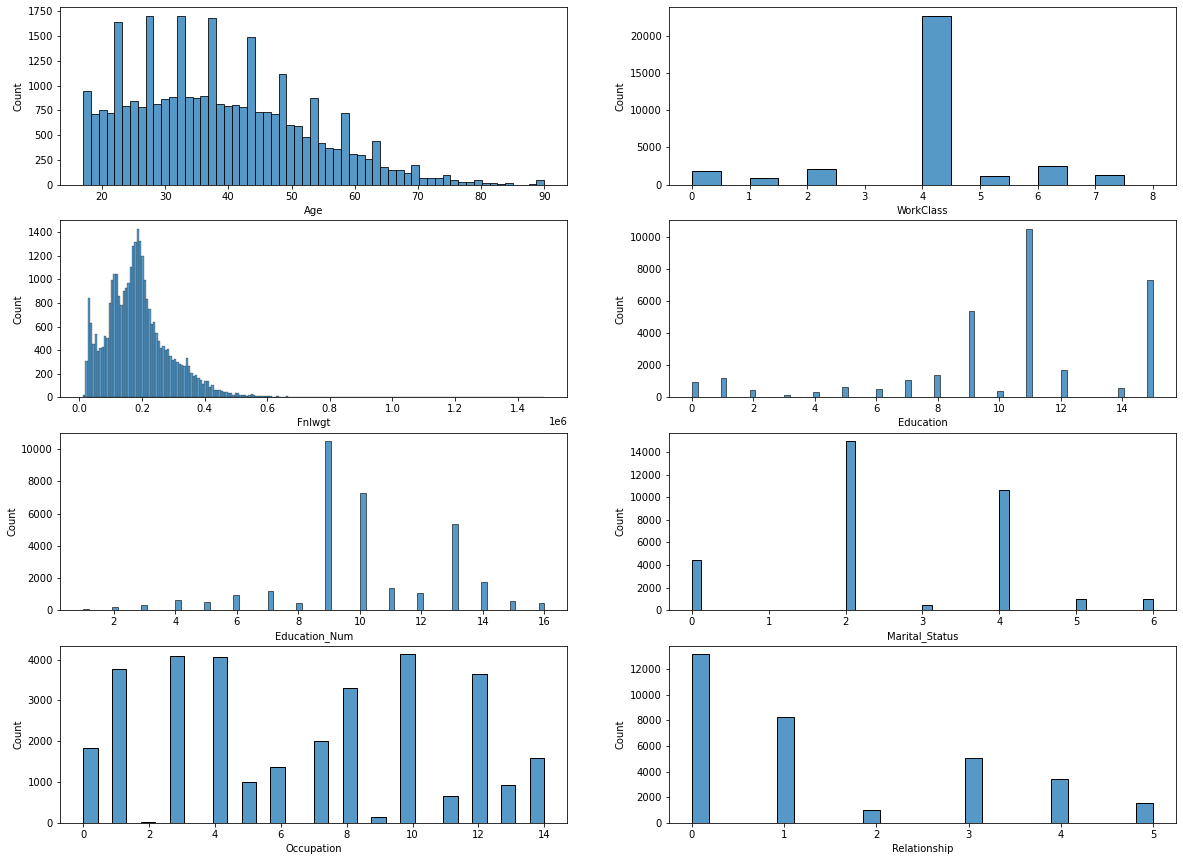

In [26]:
# h

fig, axs = plt.subplots(4,2,figsize=(20,15))
for col, ax in zip(df.columns,axs.flatten()):
    sns.histplot(x=df[col],ax = ax)

In [29]:
# Task 3

# a

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

82.28

In [33]:
# b

y_pred = logreg.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [35]:
# task 4
# a

print(confusion_matrix(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn, fp, fn, tp)

[[4651  262]
 [ 891  709]]
4651 262 891 709


In [37]:
# b

print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1-score:', f1_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))

accuracy: 0.8229694457239367
recall: 0.443125
f1-score: 0.5515363671723065
precision: 0.7301750772399588


In [40]:
# c
roc=roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1])
auc = roc_auc_score(y_test, y_pred)
print(f'roc is {roc} and auc is {auc}')

roc is 0.8624919855485446 and auc is 0.6948985472216568


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.862


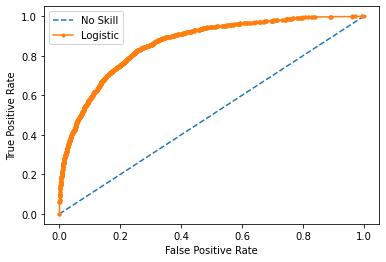

In [45]:
# d

lr_probs = logreg.predict_proba(x_test)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend();